In [1]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


Generated by John Meng, 2023/12/18. This version does not require Brian 2 package. 
For this version, the running efficiency is better at the cost of ambiguious units
and less flexible in utilizing Brian2 functions.

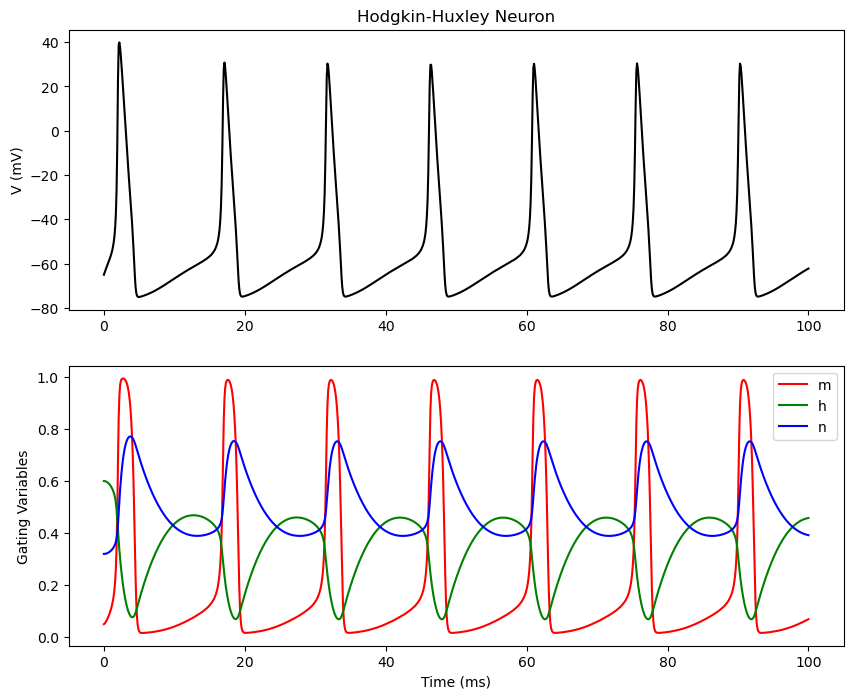

In [2]:



# Constants
Cm = 1.0  # membrane capacitance, in uF/cm^2
g_Na = 120.0  # maximum conducances, in mS/cm^2
g_K = 36.0
g_L = 0.3
E_Na = 50.0  # reversal potentials, in mV
E_K = -77.0
E_L = -54.4

# Hodgkin-Huxley equations
def hodgkin_huxley(t, X, I_ext):
    V, m, h, n = X

    # Alpha and Beta equations
    alpha_m = -0.1*(V + 40) / (np.exp(-(V + 40) / 10) - 1)
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (np.exp(-(V + 35) / 10) + 1)
    alpha_n = -0.01 * (V + 55) / (np.exp(-(V + 55) / 10) - 1)
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Calculate currents
    I_Na = (g_Na * m**3 * h * (V - E_Na))
    I_K = (g_K * n**4 * (V - E_K))
    I_L = g_L * (V - E_L)

    # Differential equations
    dVdt = (I_ext - I_Na - I_K - I_L) / Cm
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h
    dndt = alpha_n * (1 - n) - beta_n * n

    return [dVdt, dmdt, dhdt, dndt]

# Initial conditions
V0 = -65  # initial membrane potential
m0 = 0.05
h0 = 0.6
n0 = 0.32
X0 = [V0, m0, h0, n0]

# Time span
t_span = [0, 100]  # in milliseconds
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # time vector for evaluation

# External current
I_ext = 10  # external current, in microampere/cm^2

# Solve ODEs
sol = solve_ivp(hodgkin_huxley, t_span, X0, args=(I_ext,), method='RK45', t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.title('Hodgkin-Huxley Neuron')
plt.plot(sol.t, sol.y[0], 'k')
plt.ylabel('V (mV)')

plt.subplot(2,1,2)
plt.plot(sol.t, sol.y[1], 'r', label='m')
plt.plot(sol.t, sol.y[2], 'g', label='h')
plt.plot(sol.t, sol.y[3], 'b', label='n')
plt.ylabel('Gating Variables')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()
